# Thomson Sampling

### Introduction

Thompson Sampling is an algorithm that follows exploration and exploitation to maximize the cumulative rewards obtained by performing an action. Thompson Sampling is also sometimes referred to as Posterior Sampling or Probability Matching.

An action is performed multiple times which is called exploration and based on the results obtained from the actions, either rewards or penalties, further actions are performed with the goal to maximize the reward which is called exploitation. In other words, new choices are explored to maximize rewards while exploiting the already explored choices.

One of the first and the best examples to explain the Thompson Sampling method was the Multi-Armed Bandit problem.

### Multi-Armed Bandit Problem

1. To begin with, all machines are assumed to have a uniform distribution of the probability of success, in this case getting a    reward

2. For each observation obtained from a Slot machine, based on the reward a new distribution is generated with probabilities of    success for each slot machine

3. Further observations are made based on these prior probabilities obtained on each round or observation which then updates 
   the success distributions

4. After sufficient observations, each slot machine will have a success distribution associated with it which can help the          player in choosing the machines wisely to get the maximum rewards

### Thomson Algorithm
              
![Thomson ALGORITHM](talgo.png)

## Importing the Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the Dataset

In [18]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [19]:
print(dataset)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
5        1     1     0     0     0     0     0     0     0      0
6        0     0     0     1     0     0     0     0     0      0
7        1     1     0     0     1     0     0     0     0      0
8        0     0     0     0     0     0     0     0     0      0
9        0     0     1     0     0     0     0     0     0      0
10       0     0     0     0     0     0     0     0     0      0
11       0     0     0     0     0     0     0     0     0      0
12       0     0     0     1     0     0     0     0     0      0
13       0     0     0     0     0     0     0     0     1      0
14       0

## Implementing Thomson Sampling

First of all we declare the initial variables as follows:

    N = total number of users or obseervations(no. of rows)

    d = total number of adds(no. of columns)

    ads_selected = list of all the ads selected for all users or observation while iterating for all users

    numbers_of_rewards_1 (Ni1)= list containg reward for selected ads

    numbers_of_rewards_0 (Ni0)= list containg reward for unselected add

    total_reward = total reward of ad after being selected for all users

Now we iterate through all the users(rows) via iterator n and at each iteration we set the ad to first ad and max_upper_bound at first ad to zero.

Now for each user(row) we iterate through ads(columns) via iterator i and for each iteration if the ad is selected then we do this:
                            
      1. calculate the random_beta (STEP 2 OF ALGO)

If the random_beta > max_random we do (STEP 3 ALGO):
          
     update the max random and the index of ad
      
After calculating the max_random of each ad selected or not selected by each user now we update our list of:
    
    ads_selected with the ad which was selected i.e ad at index ad
        
    now reward according to datasest or real data for that particular user and particular selected ad is stored 
    in reward variable
    
    if the reward is equal to 1 we add one to numbers_of_rewards_1[ad]
    
    else we add one to numbers_of_rewards_0[ad]
    
    at the end we calculate the total reward
      

In [22]:
import random

N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0
    
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
            
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

## Visualizing the results

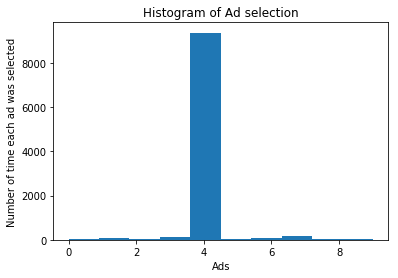

In [23]:
plt.hist(ads_selected)
plt.title('Histogram of Ad selection')
plt.xlabel('Ads')
plt.ylabel('Number of time each ad was selected')
plt.show()

The optimal number of rounds needed to find the corect ad we can try playing with value of N. 

After playing around we found that for this particular case Thomson was able to find correct add from 150 value of N thus we can set N to that and this reduces looping from 10000 to 500 and saves lot of computation!